In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

# Problem 1

In [3]:
df = pd.read_csv('SalaryData.csv')

In [4]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [5]:
df.shape

(40, 3)

In [6]:
df.dtypes

Education     object
Occupation    object
Salary         int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [8]:
df.describe().round(decimals=2)

,Salary
count,40.00
mean,162186.88
std,64860.41
min,50103.00
25%,99897.50
50%,169100.00
75%,214440.75
max,260151.00


In [9]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [10]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

#### Q 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

1)	Let us formulate the hypothesis for conducting one-way ANOVA by considering only education as categorical field on which salary is dependent:

•	H0 (null hypothesis): Mean salaries remain same across various educational categories doctorate, bachelors and HS-grade.
μD = μB = μH

•	H1 (alternate hypothesis): Mean salaries aren’t same across various educational categories
μD != μB != μH

2)	Let us formulate the hypothesis for conducting one-way ANOVA by considering only occupation as categorical field on which salary is dependent:

•	H0 (null hypothesis): Mean salaries remain same across various occupational categories Prof-specialty, Sales, Adm-clerical and Exec-managerial.
μP = μS = μA = μE

•	H1 (alternate hypothesis): Mean salaries aren’t same across various occupational categories
μP != μS != μA != μE


#### Q 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [11]:
# Setting Education as a Categorical Variable
df.Education = pd.Categorical(df.Education)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     object  
 2   Salary      40 non-null     int64   
dtypes: category(1), int64(1), object(1)
memory usage: 940.0+ bytes


In [13]:
# Defining a formula stating Salary is a o/p variable dependent on Categorical Variable Education.
formula1 = 'Salary ~ C(Education)'

In [14]:
# Model Fitting using above defined formulae
model = ols(formula1, df).fit()

In [15]:
# ANOVA Table
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


Here p-value < 0.05 so we reject Null Hypothesis.

#### Q 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [16]:
# Setting Occupation as a Categorical Variable
df.Occupation = pd.Categorical(df.Occupation)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 864.0 bytes


In [18]:
# Defining a formula stating Salary is a o/p variable dependent on Categorical Variable Occupation.
formula2 = 'Salary ~ C(Occupation)'

In [19]:
# Model Fitting using above defined formulae
model = ols(formula2, df).fit()

In [20]:
# ANOVA Table
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


Here p-value > 0.05 so we cannot reject Null Hypothesis.

#### Q 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

In [21]:
a = df.groupby('Education')['Salary'].mean().to_frame().reset_index()
a.columns = ['Education','Mean Salary']
a

,Education,Mean Salary
0,Bachelors,165152.933333
1,Doctorate,208427.000000
2,HS-grad,75038.777778


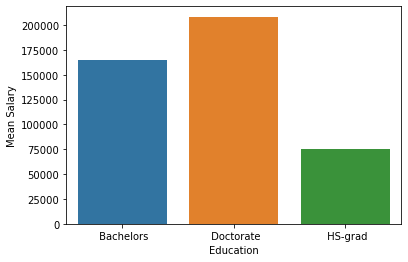

In [22]:
sns.barplot(x='Education', y='Mean Salary', data=a);

In [23]:
b = df.groupby('Occupation')['Salary'].mean().to_frame().reset_index()
b.columns = ['Occupation','Mean Salary']
b

,Occupation,Mean Salary
0,Adm-clerical,141424.300000
1,Exec-managerial,197117.600000
2,Prof-specialty,168953.153846
3,Sales,157604.416667


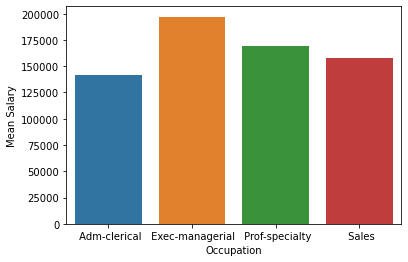

In [24]:
sns.barplot(x='Occupation', y='Mean Salary', data=b);

#### Q 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

In [25]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


Let us check whether there is any interaction effect between the treatments.

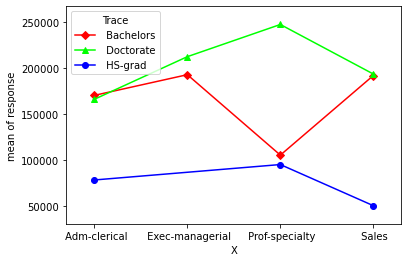

In [26]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(df['Occupation']),np.array(df['Education']),np.array(df['Salary']),markers=['D','^','o']);

#### Q 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

Since we saw that there was some sort of interaction between the two treatments, we will introduce a new interaction term Education*Occupation while performing the Two Way ANOVA.

In [27]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


# Problem 2

In [28]:
df_1 = pd.read_csv('Education.csv')

In [29]:
df_1.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [30]:
df_1.shape

(777, 18)

In [31]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [32]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [33]:
df_1.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [34]:
dups = df_1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df_1[dups]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


#### Q 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [35]:
# Collect all  numeric columns of dataset

df_num = df_1.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

17

In [36]:
lstnumericcolumns

['Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate']

In [37]:
def univariateAnalysis_numeric(column,nbins):
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df_1[column], kde=True, color='g');
    plt.show()
    
    print()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_1[column])
    plt.show()

Distribution of Apps
----------------------------------------------------------------------------


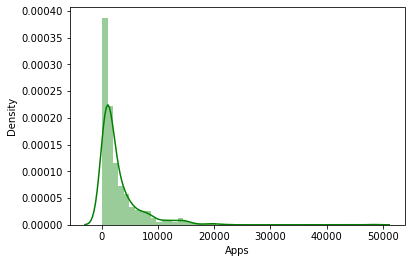


BoxPlot of Apps
----------------------------------------------------------------------------


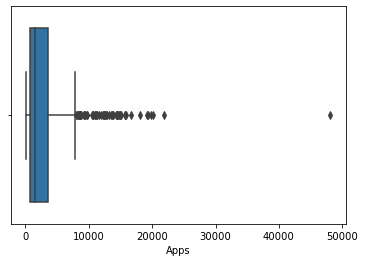

Distribution of Accept
----------------------------------------------------------------------------


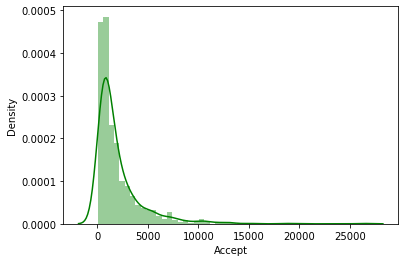


BoxPlot of Accept
----------------------------------------------------------------------------


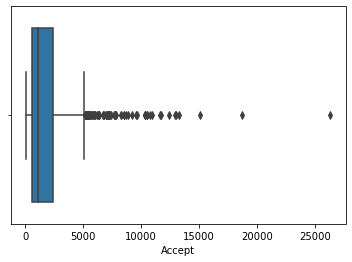

Distribution of Enroll
----------------------------------------------------------------------------


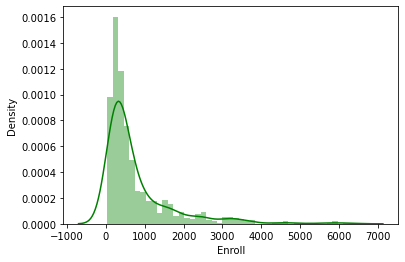


BoxPlot of Enroll
----------------------------------------------------------------------------


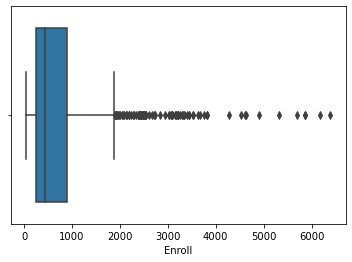

Distribution of Top10perc
----------------------------------------------------------------------------


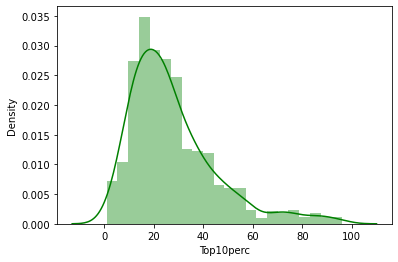


BoxPlot of Top10perc
----------------------------------------------------------------------------


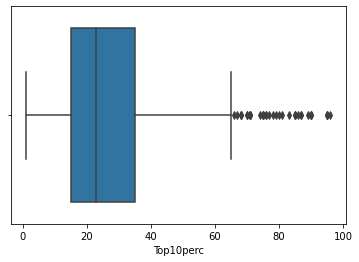

Distribution of Top25perc
----------------------------------------------------------------------------


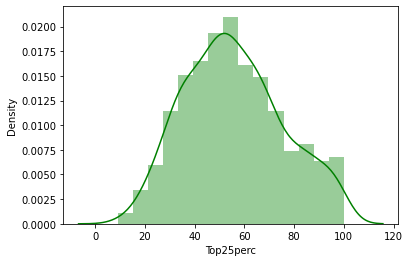


BoxPlot of Top25perc
----------------------------------------------------------------------------


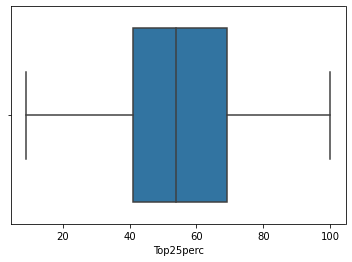

Distribution of F.Undergrad
----------------------------------------------------------------------------


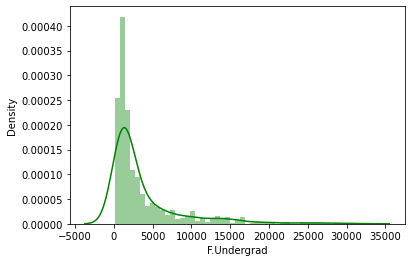


BoxPlot of F.Undergrad
----------------------------------------------------------------------------


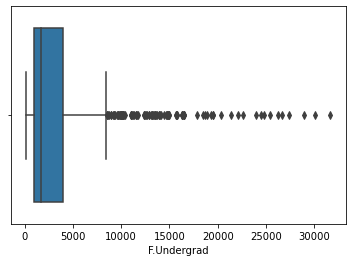

Distribution of P.Undergrad
----------------------------------------------------------------------------


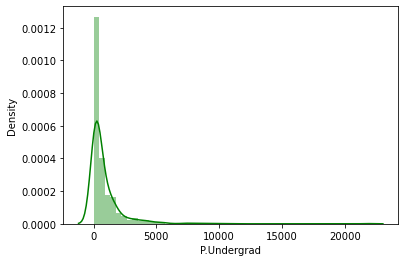


BoxPlot of P.Undergrad
----------------------------------------------------------------------------


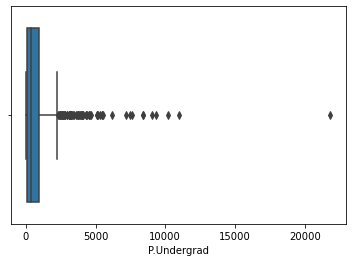

Distribution of Outstate
----------------------------------------------------------------------------


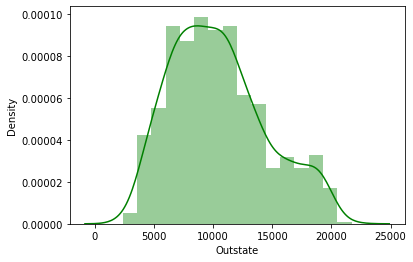


BoxPlot of Outstate
----------------------------------------------------------------------------


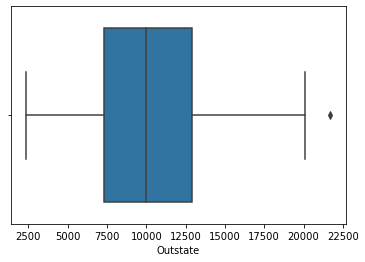

Distribution of Room.Board
----------------------------------------------------------------------------


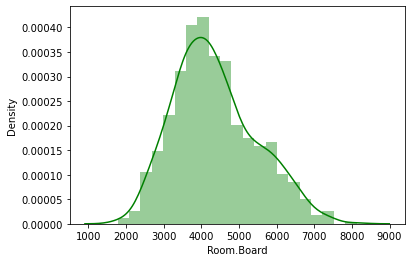


BoxPlot of Room.Board
----------------------------------------------------------------------------


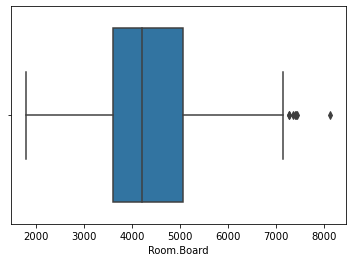

Distribution of Books
----------------------------------------------------------------------------


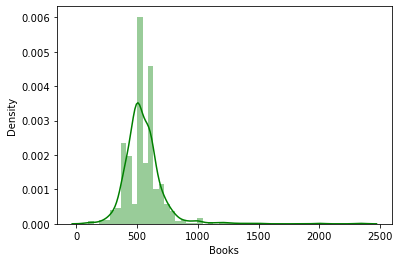


BoxPlot of Books
----------------------------------------------------------------------------


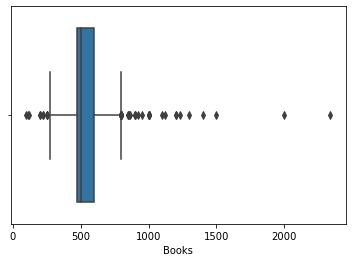

Distribution of Personal
----------------------------------------------------------------------------


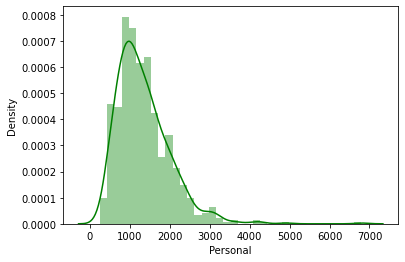


BoxPlot of Personal
----------------------------------------------------------------------------


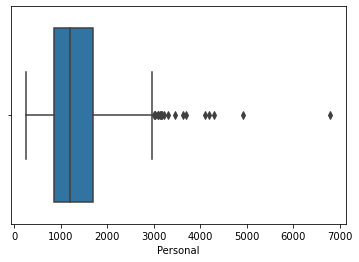

Distribution of PhD
----------------------------------------------------------------------------


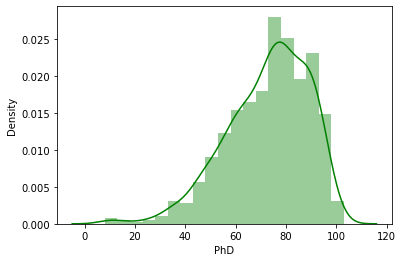


BoxPlot of PhD
----------------------------------------------------------------------------


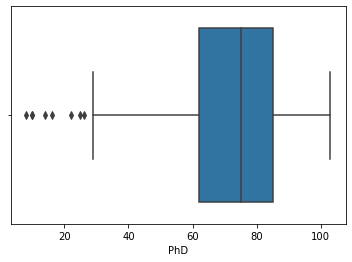

Distribution of Terminal
----------------------------------------------------------------------------


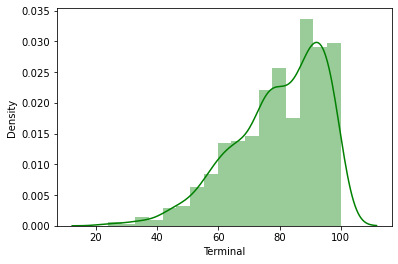


BoxPlot of Terminal
----------------------------------------------------------------------------


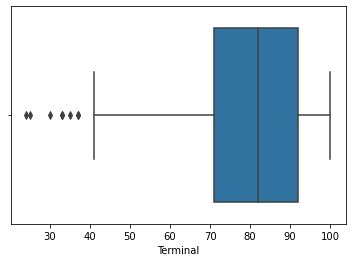

Distribution of S.F.Ratio
----------------------------------------------------------------------------


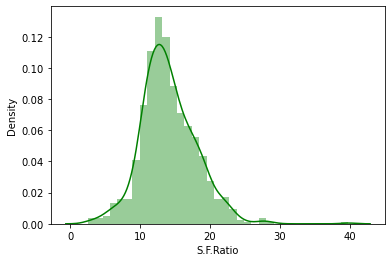


BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


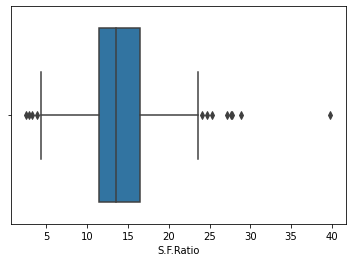

Distribution of perc.alumni
----------------------------------------------------------------------------


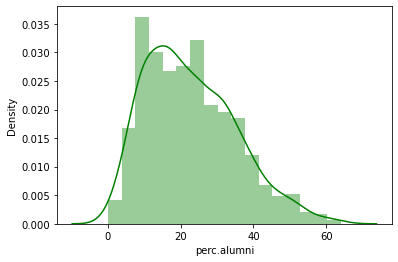


BoxPlot of perc.alumni
----------------------------------------------------------------------------


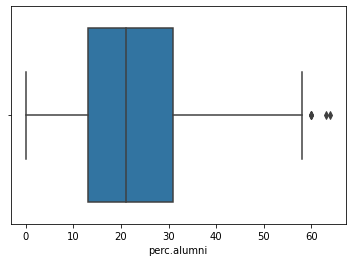

Distribution of Expend
----------------------------------------------------------------------------


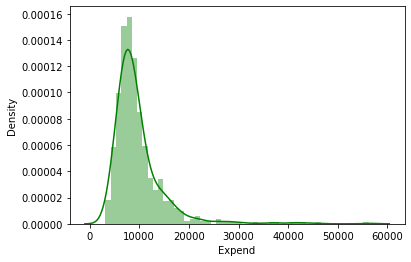


BoxPlot of Expend
----------------------------------------------------------------------------


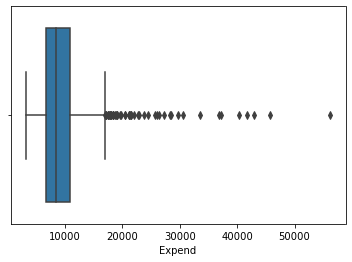

Distribution of Grad.Rate
----------------------------------------------------------------------------


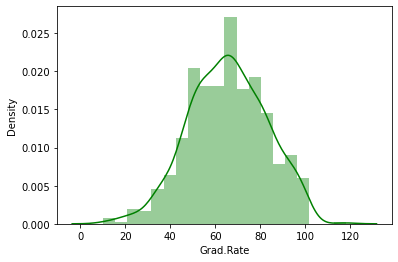


BoxPlot of Grad.Rate
----------------------------------------------------------------------------


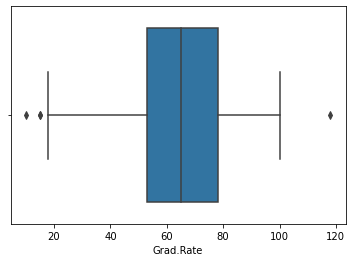

In [38]:
for col in lstnumericcolumns:
    univariateAnalysis_numeric(col,20)

In [39]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [40]:
df_pca = df_1.copy() # Taking a copy

In [41]:
for i in lstnumericcolumns:
    LL, UL = remove_outlier(df_pca[i])
    df_pca[i] = np.where(df_pca[i] > UL, UL, df_pca[i])
    df_pca[i] = np.where(df_pca[i] < LL, LL, df_pca[i])

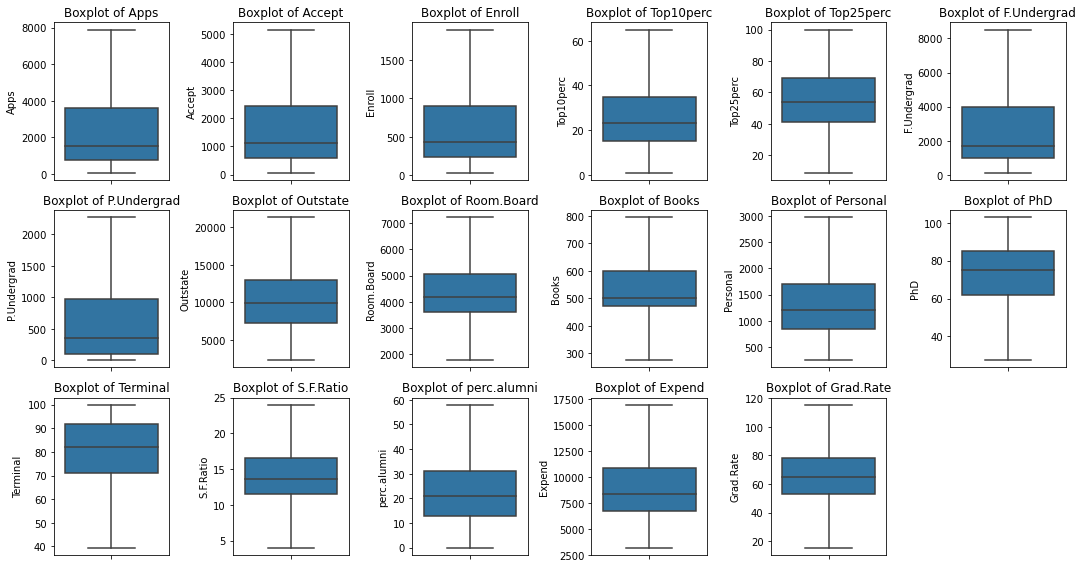

In [42]:
#Check to verify if outliers have been treated
plt.figure(figsize = (15,8))
for i in range(len(lstnumericcolumns)):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y = df_pca[lstnumericcolumns[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(lstnumericcolumns[i]))
    plt.tight_layout()

In [43]:
# Covariance Matrix Before Scaling

covMatrix = pd.DataFrame.cov(df_1)
covMatrix

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.497846e+07,8.949860e+06,3.045256e+06,23132.773138,26952.663479,1.528970e+07,2.346620e+06,7.809704e+05,7.000729e+05,84703.752639,4.683468e+05,24689.433666,21053.067602,1465.060576,-4327.122381,5.246171e+06,9756.421641
Accept,8.949860e+06,6.007960e+06,2.076268e+06,8321.124872,12013.404757,1.039358e+07,1.646670e+06,-2.539623e+05,2.443471e+05,45942.807867,3.335566e+05,14238.201489,12182.093828,1709.838189,-4859.487022,1.596272e+06,2834.162918
Enroll,3.045256e+06,2.076268e+06,8.633684e+05,2971.583415,4172.592435,4.347530e+06,7.257907e+05,-5.811885e+05,-4.099706e+04,17291.199742,1.767380e+05,5028.961166,4217.086027,872.684773,-2081.693787,3.113454e+05,-356.587977
Top10perc,2.313277e+04,8.321125e+03,2.971583e+03,311.182456,311.630480,1.208911e+04,-2.829475e+03,3.990718e+04,7.186706e+03,346.177405,-1.114551e+03,153.184870,127.551581,-26.874525,99.567208,6.087931e+04,149.992164
Top25perc,2.695266e+04,1.201340e+04,4.172592e+03,311.630480,392.229216,1.915895e+04,-1.615412e+03,3.899243e+04,7.199904e+03,377.759266,-1.083605e+03,176.518449,153.002612,-23.097199,102.550946,5.454648e+04,162.371398
F.Undergrad,1.528970e+07,1.039358e+07,4.347530e+06,12089.113681,19158.952782,2.352658e+07,4.212910e+06,-4.209843e+06,-3.664582e+05,92535.764728,1.041709e+06,25211.784197,21424.241746,5370.208581,-13791.929691,4.724040e+05,-6563.307527
P.Undergrad,2.346620e+06,1.646670e+06,7.257907e+05,-2829.474981,-1615.412144,4.212910e+06,2.317799e+06,-1.552704e+06,-1.023919e+05,20410.446674,3.297324e+05,3706.756219,3180.596615,1401.302563,-5297.337090,-6.643512e+05,-6721.062488
Outstate,7.809704e+05,-2.539623e+05,-5.811885e+05,39907.179832,38992.427500,-4.209843e+06,-1.552704e+06,1.618466e+07,2.886597e+06,25808.242145,-8.146737e+05,25157.515051,24164.147673,-8835.253539,28229.553066,1.413324e+07,39479.681796
Room.Board,7.000729e+05,2.443471e+05,-4.099706e+04,7186.705605,7199.903568,-3.664582e+05,-1.023919e+05,2.886597e+06,1.202743e+06,23170.313390,-1.480838e+05,5895.034749,6047.299735,-1574.205914,3701.431379,2.873308e+06,8005.360183
Books,8.470375e+04,4.594281e+04,1.729120e+04,346.177405,377.759266,9.253576e+04,2.041045e+04,2.580824e+04,2.317031e+04,27259.779946,2.004303e+04,72.534242,242.963918,-20.867207,-82.263132,9.691258e+04,3.008837


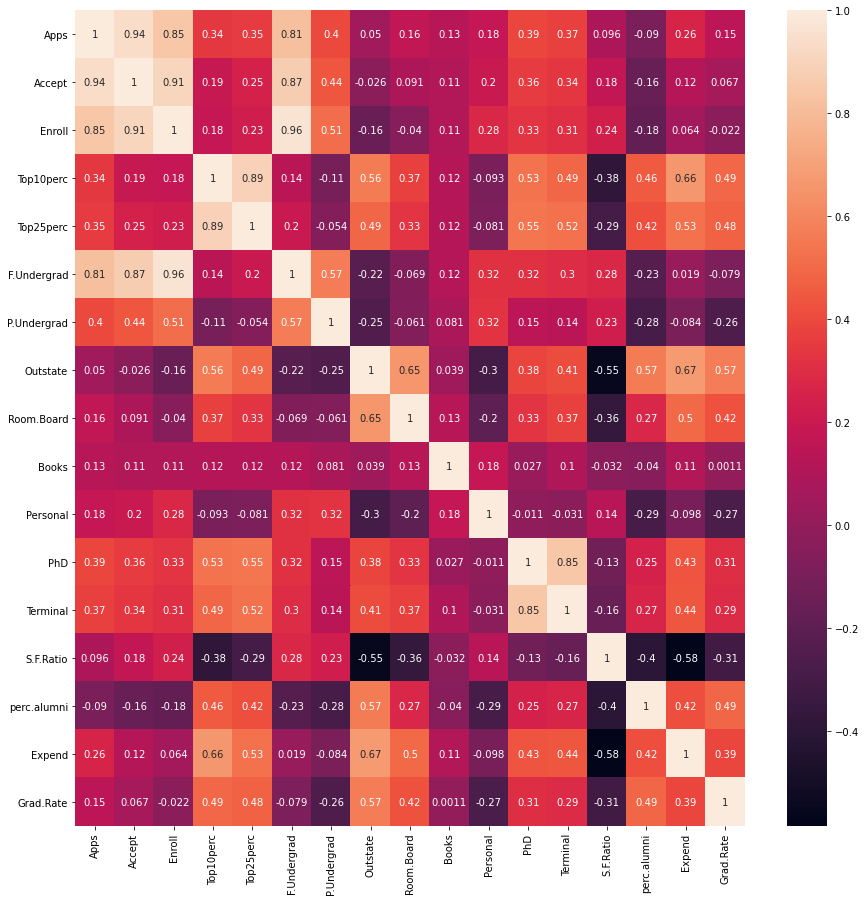

In [44]:
# Correlation Plot Before Scaling

cor = df_1.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(cor,annot = True);

In [45]:
#Scale the data
from scipy.stats import zscore
df_pca_scaled = df_pca[lstnumericcolumns].apply(zscore)

In [46]:
df_pca_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


#### Q 2.3 Comment on the comparison between the covariance and the correlation matrices from this data[on scaled data]

In [47]:
# Covariance Matrix After Scaling

covMatrix = pd.DataFrame.cov(df_pca_scaled)
covMatrix

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.001289,0.956538,0.898039,0.321756,0.364961,0.862111,0.520493,0.065421,0.187717,0.236442,0.230244,0.464522,0.435038,0.126574,-0.101288,0.243248,0.150998
Accept,0.956538,1.001289,0.936482,0.223586,0.274033,0.898190,0.573429,-0.005009,0.119740,0.208974,0.256676,0.427891,0.403929,0.188749,-0.165729,0.162017,0.079084
Enroll,0.898039,0.936482,1.001289,0.171977,0.230731,0.968549,0.642422,-0.155856,-0.023876,0.202317,0.339785,0.382031,0.354836,0.274622,-0.223010,0.054291,-0.023281
Top10perc,0.321756,0.223586,0.171977,1.001289,0.915053,0.111358,-0.180241,0.562884,0.357826,0.153650,-0.116880,0.544749,0.507401,-0.388426,0.456384,0.657886,0.494307
Top25perc,0.364961,0.274033,0.230731,0.915053,1.001289,0.181429,-0.099423,0.490200,0.331413,0.169980,-0.086922,0.552172,0.528334,-0.297616,0.417369,0.573643,0.479602
F.Undergrad,0.862111,0.898190,0.968549,0.111358,0.181429,1.001289,0.697027,-0.226457,-0.054546,0.208147,0.360246,0.362030,0.335486,0.324922,-0.285825,0.000371,-0.082345
P.Undergrad,0.520493,0.573429,0.642422,-0.180241,-0.099423,0.697027,1.001289,-0.354673,-0.067725,0.122686,0.344496,0.127827,0.122309,0.371085,-0.419874,-0.202189,-0.265499
Outstate,0.065421,-0.005009,-0.155856,0.562884,0.490200,-0.226457,-0.354673,1.001289,0.656334,0.005117,-0.326029,0.391825,0.413110,-0.574422,0.566465,0.776327,0.573196
Room.Board,0.187717,0.119740,-0.023876,0.357826,0.331413,-0.054546,-0.067725,0.656334,1.001289,0.109065,-0.219837,0.341909,0.379759,-0.376915,0.272744,0.581370,0.426339
Books,0.236442,0.208974,0.202317,0.153650,0.169980,0.208147,0.122686,0.005117,0.109065,1.001289,0.240172,0.136566,0.159523,-0.008547,-0.042887,0.150177,-0.008061


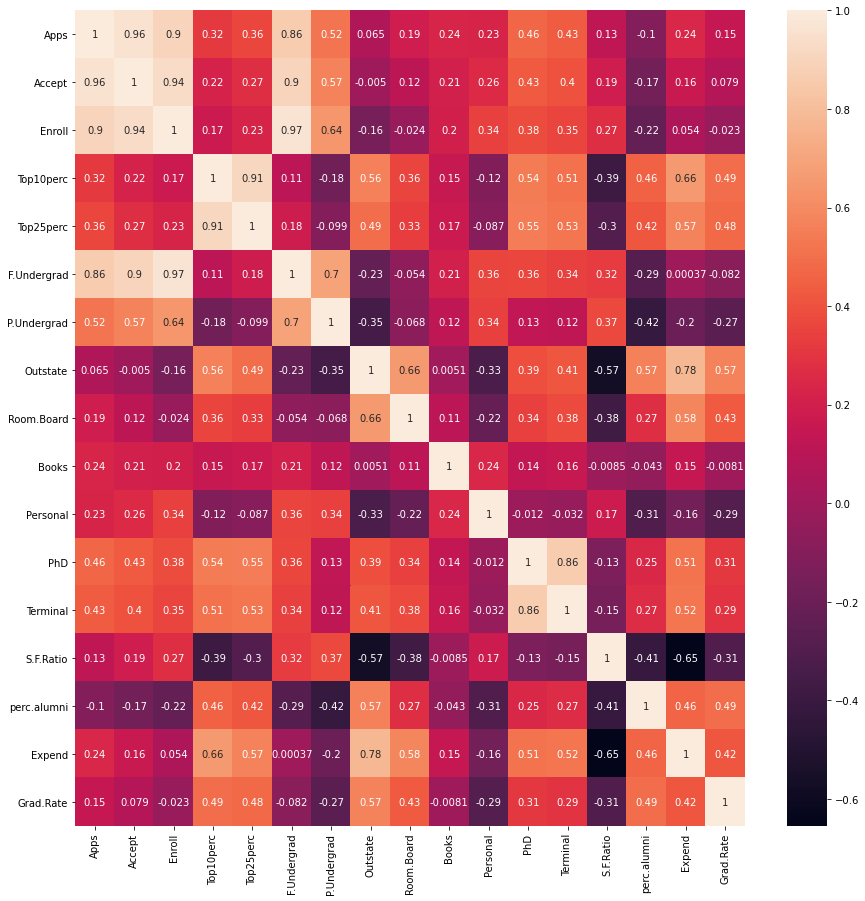

In [48]:
# Correlation Plot After Scaling

cor = df_pca_scaled.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(cor,annot = True);

In [49]:
cor

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.955307,0.896883,0.321342,0.364491,0.861002,0.519823,0.065337,0.187475,0.236138,0.229948,0.463924,0.434478,0.126411,-0.101158,0.242935,0.150803
Accept,0.955307,1.000000,0.935277,0.223298,0.273681,0.897034,0.572691,-0.005002,0.119586,0.208705,0.256346,0.427341,0.403409,0.188506,-0.165516,0.161808,0.078982
Enroll,0.896883,0.935277,1.000000,0.171756,0.230434,0.967302,0.641595,-0.155655,-0.023846,0.202057,0.339348,0.381540,0.354379,0.274269,-0.222723,0.054221,-0.023251
Top10perc,0.321342,0.223298,0.171756,1.000000,0.913875,0.111215,-0.180009,0.562160,0.357366,0.153452,-0.116730,0.544048,0.506748,-0.387926,0.455797,0.657039,0.493670
Top25perc,0.364491,0.273681,0.230434,0.913875,1.000000,0.181196,-0.099295,0.489569,0.330987,0.169761,-0.086810,0.551461,0.527654,-0.297233,0.416832,0.572905,0.478985
F.Undergrad,0.861002,0.897034,0.967302,0.111215,0.181196,1.000000,0.696130,-0.226166,-0.054476,0.207879,0.359783,0.361564,0.335054,0.324504,-0.285457,0.000371,-0.082239
P.Undergrad,0.519823,0.572691,0.641595,-0.180009,-0.099295,0.696130,1.000000,-0.354216,-0.067638,0.122529,0.344053,0.127663,0.122152,0.370607,-0.419334,-0.201929,-0.265158
Outstate,0.065337,-0.005002,-0.155655,0.562160,0.489569,-0.226166,-0.354216,1.000000,0.655489,0.005110,-0.325609,0.391321,0.412579,-0.573683,0.565736,0.775328,0.572458
Room.Board,0.187475,0.119586,-0.023846,0.357366,0.330987,-0.054476,-0.067638,0.655489,1.000000,0.108924,-0.219554,0.341469,0.379270,-0.376430,0.272393,0.580622,0.425790
Books,0.236138,0.208705,0.202057,0.153452,0.169761,0.207879,0.122529,0.005110,0.108924,1.000000,0.239863,0.136390,0.159318,-0.008536,-0.042832,0.149983,-0.008051


#### Q 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

In [50]:
ddf = pd.read_csv('Education.csv')

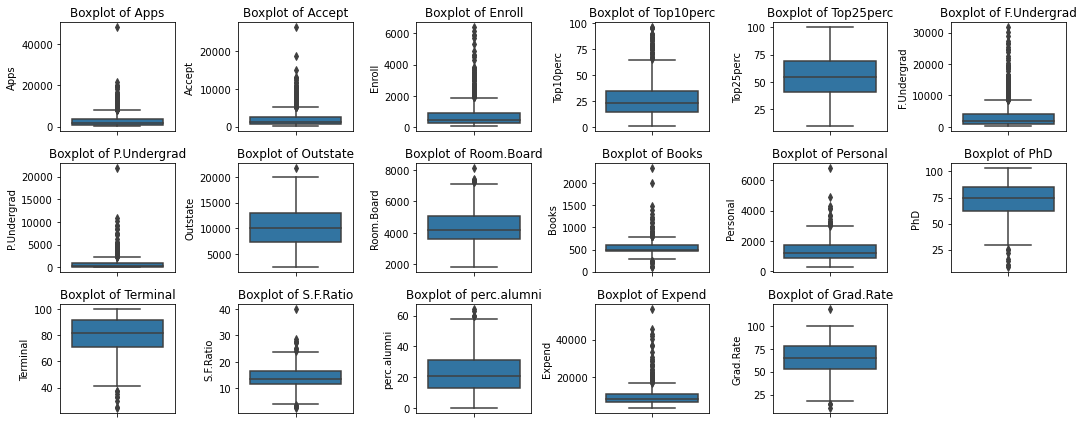

In [51]:
plt.figure(figsize = (15,6))
for i in range(len(lstnumericcolumns)):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y = ddf[lstnumericcolumns[i]], data = ddf)
    plt.title('Boxplot of {}'.format(lstnumericcolumns[i]))
    plt.tight_layout()

In [52]:
#Scale the data
from scipy.stats import zscore
ddf_scaled = ddf[lstnumericcolumns].apply(zscore)

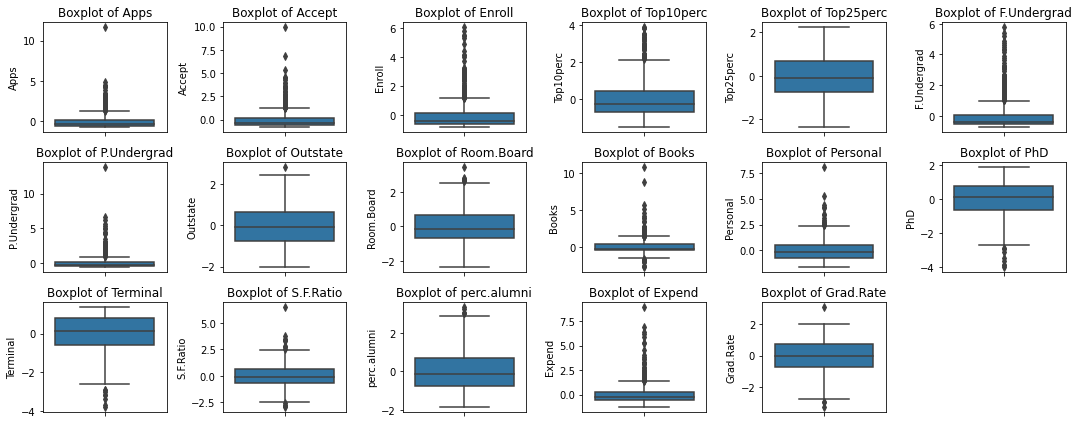

In [53]:
plt.figure(figsize = (15,6))
for i in range(len(lstnumericcolumns)):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y = ddf_scaled[lstnumericcolumns[i]], data = ddf_scaled)
    plt.title('Boxplot of {}'.format(lstnumericcolumns[i]))
    plt.tight_layout()

#### Q 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [54]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

0.0

In [55]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.8494624668231415

In [56]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=len(lstnumericcolumns), random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [57]:
#Extract eigen vectors upto 3 decimal points
np.around(pca.components_,3)

array([[ 0.262,  0.231,  0.189,  0.339,  0.335,  0.163,  0.022,  0.284,
         0.244,  0.097, -0.035,  0.326,  0.323, -0.163,  0.187,  0.329,
         0.239],
       [ 0.314,  0.345,  0.383, -0.099, -0.06 ,  0.399,  0.358, -0.252,
        -0.132,  0.094,  0.232,  0.055,  0.043,  0.26 , -0.257, -0.16 ,
        -0.168],
       [-0.081, -0.108, -0.086,  0.079,  0.051, -0.074, -0.04 , -0.015,
         0.021,  0.697,  0.531, -0.081, -0.059, -0.274, -0.104,  0.184,
        -0.245],
       [ 0.099,  0.118,  0.009, -0.369, -0.417,  0.014,  0.225,  0.263,
         0.581, -0.036, -0.115, -0.147, -0.089, -0.259, -0.224,  0.214,
        -0.036],
       [ 0.22 ,  0.19 ,  0.162,  0.157,  0.144,  0.103, -0.096,  0.037,
        -0.069,  0.035, -0.   , -0.551, -0.59 , -0.143,  0.128, -0.022,
         0.357],
       [ 0.002, -0.017, -0.068, -0.089, -0.028, -0.052, -0.025, -0.02 ,
         0.237,  0.639, -0.381,  0.003,  0.035,  0.469,  0.013, -0.232,
         0.314],
       [-0.028, -0.013, -0.015, -0

In [58]:
#Extract eigen values upto 3 decimal points
np.around(pca.explained_variance_,3)

array([5.663, 4.895, 1.126, 1.004, 0.872, 0.766, 0.585, 0.545, 0.424,
       0.381, 0.247, 0.147, 0.134, 0.099, 0.075, 0.038, 0.022])

#### Q 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [59]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(np.around(pca.components_,2).T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                               'PC13', 'PC14', 'PC15', 'PC16', 'PC17'],
                                    index = df_pca_scaled.columns)
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Apps,0.26,0.31,-0.08,0.10,0.22,0.00,-0.03,-0.09,-0.13,-0.16,-0.09,-0.09,-0.09,-0.55,0.01,0.60,-0.18
Accept,0.23,0.34,-0.11,0.12,0.19,-0.02,-0.01,-0.14,-0.14,-0.15,-0.04,-0.16,-0.04,-0.29,0.01,-0.66,0.39
Enroll,0.19,0.38,-0.09,0.01,0.16,-0.07,-0.02,-0.14,-0.05,-0.06,-0.04,0.04,0.06,0.42,-0.05,-0.23,-0.72
Top10perc,0.34,-0.10,0.08,-0.37,0.16,-0.09,-0.26,0.29,0.12,-0.04,0.00,0.04,-0.07,-0.01,-0.72,-0.02,0.06
Top25perc,0.33,-0.06,0.05,-0.42,0.14,-0.03,-0.24,0.35,0.19,0.01,-0.10,-0.15,0.10,0.01,0.66,-0.03,-0.02
F.Undergrad,0.16,0.40,-0.07,0.01,0.10,-0.05,-0.03,-0.11,-0.00,-0.00,-0.03,0.13,0.09,0.57,0.03,0.37,0.54
P.Undergrad,0.02,0.36,-0.04,0.23,-0.10,-0.02,-0.01,0.12,0.63,0.55,0.25,-0.05,-0.04,-0.15,-0.04,-0.03,-0.03
Outstate,0.28,-0.25,-0.01,0.26,0.04,-0.02,0.09,0.01,0.01,-0.23,0.59,-0.56,-0.07,0.21,-0.00,0.08,-0.00
Room.Board,0.24,-0.13,0.02,0.58,-0.07,0.24,0.09,0.39,0.22,-0.26,-0.48,0.11,-0.02,0.10,-0.03,-0.03,-0.01
Books,0.10,0.09,0.70,-0.04,0.04,0.64,-0.11,-0.24,-0.02,0.09,0.04,-0.05,-0.04,0.03,-0.01,-0.01,-0.00


#### Q 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [60]:
df_extracted_loadings.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17'],
      dtype='object')

In [61]:
for i in df_extracted_loadings.columns:
    print('{} = {}Apps + {}Accept + {}Enroll + {}Top10perc + {}Top25perc + {}F.Undergrad + {}P.Undergrad + {}Outstate + {}Room.Board + {}Books + {}Personal + {}PhD + {}Terminal + {}S.F.Ratio + {}perc.alumni + {}Expend + {}Grad.Rate'.format(i,df_extracted_loadings[i]['Apps'], df_extracted_loadings[i]['Accept'], df_extracted_loadings[i]['Enroll'], df_extracted_loadings[i]['Top10perc'], df_extracted_loadings[i]['Top25perc'], df_extracted_loadings[i]['F.Undergrad'] , df_extracted_loadings[i]['P.Undergrad'], df_extracted_loadings[i]['Outstate'], df_extracted_loadings[i]['Room.Board'], df_extracted_loadings[i]['Books'], df_extracted_loadings[i]['Personal'], df_extracted_loadings[i]['PhD'] , df_extracted_loadings[i]['Terminal'], df_extracted_loadings[i]['S.F.Ratio'], df_extracted_loadings[i]['perc.alumni'], df_extracted_loadings[i]['Expend'], df_extracted_loadings[i]['Grad.Rate']))

PC1 = 0.26Apps + 0.23Accept + 0.19Enroll + 0.34Top10perc + 0.33Top25perc + 0.16F.Undergrad + 0.02P.Undergrad + 0.28Outstate + 0.24Room.Board + 0.1Books + -0.04Personal + 0.33PhD + 0.32Terminal + -0.16S.F.Ratio + 0.19perc.alumni + 0.33Expend + 0.24Grad.Rate
PC2 = 0.31Apps + 0.34Accept + 0.38Enroll + -0.1Top10perc + -0.06Top25perc + 0.4F.Undergrad + 0.36P.Undergrad + -0.25Outstate + -0.13Room.Board + 0.09Books + 0.23Personal + 0.06PhD + 0.04Terminal + 0.26S.F.Ratio + -0.26perc.alumni + -0.16Expend + -0.17Grad.Rate
PC3 = -0.08Apps + -0.11Accept + -0.09Enroll + 0.08Top10perc + 0.05Top25perc + -0.07F.Undergrad + -0.04P.Undergrad + -0.01Outstate + 0.02Room.Board + 0.7Books + 0.53Personal + -0.08PhD + -0.06Terminal + -0.27S.F.Ratio + -0.1perc.alumni + 0.18Expend + -0.25Grad.Rate
PC4 = 0.1Apps + 0.12Accept + 0.01Enroll + -0.37Top10perc + -0.42Top25perc + 0.01F.Undergrad + 0.23P.Undergrad + 0.26Outstate + 0.58Room.Board + -0.04Books + -0.11Personal + -0.15PhD + -0.09Terminal + -0.26S.F.Ratio + 

#### Q 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [62]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.33266084, 0.28755345, 0.06617164, 0.05898144, 0.05123893,
       0.04498639, 0.03436243, 0.03198847, 0.02488108, 0.02238396,
       0.01451157, 0.00865143, 0.00789247, 0.00580627, 0.00438788,
       0.00222619, 0.00131558])

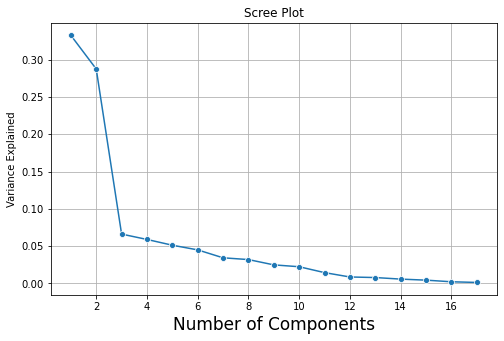

In [63]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,18),marker='o')
plt.xlabel('Number of Components',fontsize=17)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [64]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.33266084, 0.62021429, 0.68638592, 0.74536736, 0.79660629,
       0.84159268, 0.8759551 , 0.90794357, 0.93282465, 0.95520861,
       0.96972018, 0.97837162, 0.98626408, 0.99207036, 0.99645823,
       0.99868442, 1.        ])

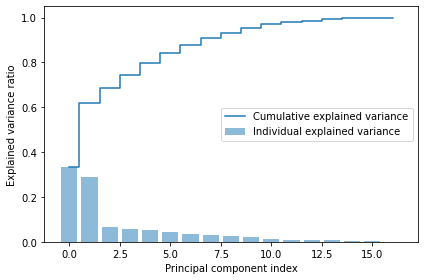

In [65]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [66]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]

In [67]:
#Check the selected PCs
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6
Apps,0.26,0.31,-0.08,0.10,0.22,0.00
Accept,0.23,0.34,-0.11,0.12,0.19,-0.02
Enroll,0.19,0.38,-0.09,0.01,0.16,-0.07
Top10perc,0.34,-0.10,0.08,-0.37,0.16,-0.09
Top25perc,0.33,-0.06,0.05,-0.42,0.14,-0.03
F.Undergrad,0.16,0.40,-0.07,0.01,0.10,-0.05
P.Undergrad,0.02,0.36,-0.04,0.23,-0.10,-0.02
Outstate,0.28,-0.25,-0.01,0.26,0.04,-0.02
Room.Board,0.24,-0.13,0.02,0.58,-0.07,0.24
Books,0.10,0.09,0.70,-0.04,0.04,0.64


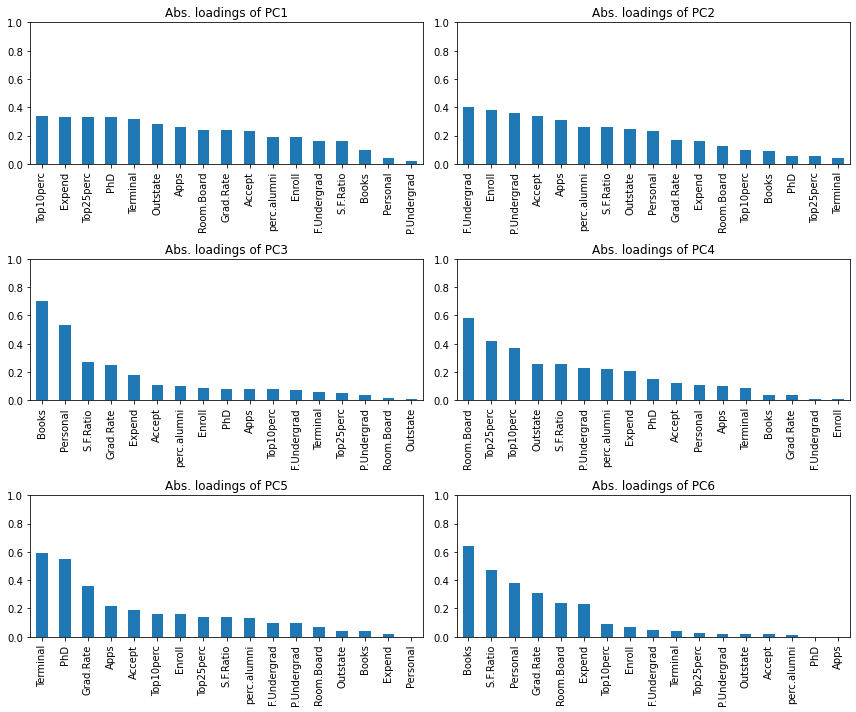

In [68]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (12,10))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

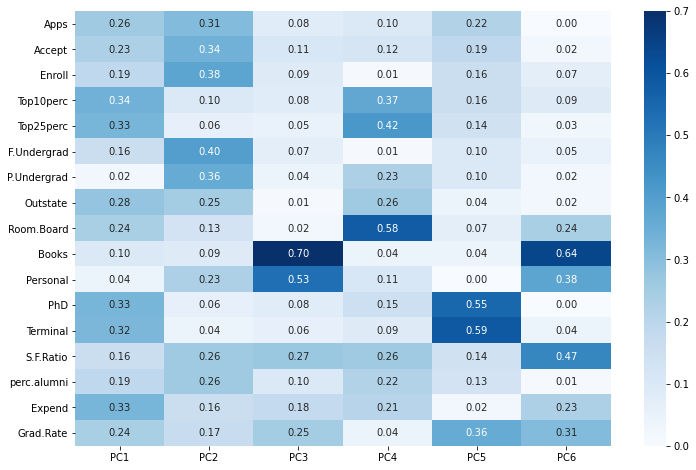

In [69]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [70]:
# Obtaining the Scores (dot product between the loadings and features)
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [71]:
#Just create a dataframe out of fit_transformed scaled data above
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.602499,0.993683,0.030045,-1.008422,-0.366886,-0.697476
1,-1.804675,-0.070415,2.122128,3.138941,2.453212,0.994858
2,-1.608283,-1.382792,-0.501513,-0.036373,0.765997,-1.026237
3,2.803644,-3.367395,0.367768,-0.632914,-1.192601,-1.457080
4,-2.200868,-0.099348,3.122523,0.657707,-1.828044,0.140915
5,-0.730164,-1.998741,0.237171,-0.312879,0.062740,-0.821044
6,0.004516,-1.884603,0.237183,0.857612,-1.878437,-0.132645
7,1.836067,-1.733341,-0.995891,-0.521397,-0.996700,-0.117335
8,0.619231,-2.459100,-1.823771,0.329401,-0.341261,-0.977575
9,-2.934353,-1.106131,2.142631,0.235399,1.926359,-0.320840


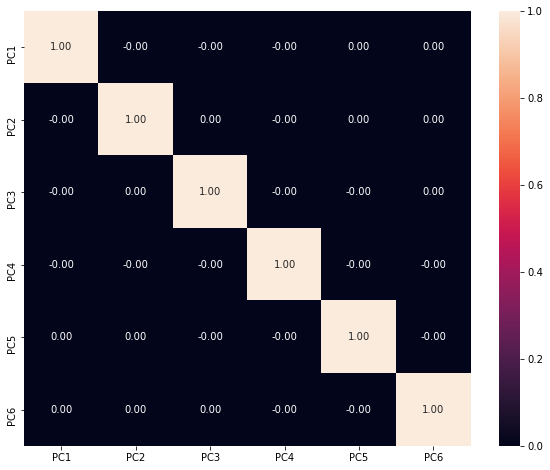

In [72]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');